# Modules BEGINNER

Esta tabla contiene la información a nivel de fichero (módulo) de la clase BEGINNER.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [2]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'module__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('modules')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-09 20:14:12.987852 Data cache files found ...
2024-05-09 20:14:12.998854 Data cache files successfully loaded!!
The dataset contains 7124 (39.09%) instances for BEGINNER class and 11102 (60.91%) for EXPERT class.


In [3]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a file. For each file we have {X.shape[1]} attributes.')

 BEGINNER CLASS Features shape: (7124, 13)
As we can see the downloaded data contains a total of 7124 instances of BEGINNER. Each of the instances corresponds to a file. For each file we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7124 entries, 0 to 7257
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              7124 non-null   object 
 1   module__has_doc_string               7124 non-null   bool   
 2   module__global_stmts_pct             7124 non-null   float64
 3   module__global_expressions           7124 non-null   float64
 4   module__number_of_classes            7124 non-null   int64  
 5   module__number_of_functions          7124 non-null   int64  
 6   module__class_defs_pct               7124 non-null   float64
 7   module__function_defs_pct            7124 non-null   float64
 8   module__enum_defs_pct                7124 non-null   float64
 9   module__average_stmts_function_body  7124 non-null   float64
 10  module__average_stmts_method_body    7124 non-null   float64
 11  module__type_annotations_pct       

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y dos de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [5]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [64.46%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [6]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions             0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
dtype: int64

In [7]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions
--------------------------
0 instancias no tienen un valor para la columna module__global_expressions


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__function_defs_

### 2.4 - Describimos los valores de las variables de la tabla.

In [8]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,7124,6,Lower,3126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,7124,2,False,5749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,7124.0,NaN,NaN,NaN,0.322743,0.321525,0.0,0.0,0.222222,0.555556,1.0
module__global_expressions,7124.0,NaN,NaN,NaN,0.115504,0.173264,0.0,0.0,0.0,0.2,1.0
module__number_of_classes,7124.0,NaN,NaN,NaN,0.979506,3.819694,0.0,0.0,0.0,1.0,60.0
module__number_of_functions,7124.0,NaN,NaN,NaN,2.973049,6.652743,0.0,0.0,1.0,3.0,80.0
module__class_defs_pct,7124.0,NaN,NaN,NaN,0.201313,0.361768,0.0,0.0,0.0,0.25,1.0
module__function_defs_pct,7124.0,NaN,NaN,NaN,0.549529,0.466528,0.0,0.0,0.75,1.0,1.0
module__enum_defs_pct,7124.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
module__average_stmts_function_body,7124.0,NaN,NaN,NaN,3.055419,3.675243,0.0,0.0,2.8,4.857143,43.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [9]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.19
    "module__number_of_classes": [(1, 1), (2,2), (3,3), (4,inf)],  # min: 1 max: 3294
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 238
    "module__type_annotations_pct": [(0, 0), (0, 1.0)], # min: 0 max: 1297
    "module__average_stmts_function_body": [(0, 0), (0, 1), (1, 3), (3, inf)],
    "module__average_stmts_method_body": [(0, 0), (0, 1), (1, 3), (3, inf)],
    "module__global_expressions": [(0,0), (0, inf)], # min: 0 max: 26
    "module__global_stmts_pct": [(0, 0), (0, inf)]
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__name_convention_SnakeCase', 'module__expertise_level_EXPERT'], 10))
print(get_statistics(X_copy, ['module__name_convention_CamelUp', 'module__expertise_level_BEGINNER'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   5036   70.690623
             [0.0_1.0)   1087   15.258282
             [1.0_1.0]   1001   14.051095

module__function_defs_pct  count  percentage
                [1.0_1.0]   3261   45.774846
                [0.0_0.0]   2776   38.966873
                [0.0_1.0)   1087   15.258282

module__enum_defs_pct  count  percentage
            [0.0_0.0]   7124       100.0

module__number_of_classes  count  percentage
                  unknown   5036   70.690623
                    [1_1]   1159   16.268950
                  [4_inf]    497    6.976418
                    [2_2]    332    4.660303
                    [3_3]    100    1.403706

module__number_of_functions  count  percentage
                    [0_inf]   4348   61.033127
                      [0_0]   2776   38.966873

module__type_annotations_pct  count  percentage
                       [0_0]   6239   87.577204
                     [0_1.0)    885

KeyError: 'module__name_convention_SnakeCase'

In [ ]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

In [ ]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable has_doc_string (1/14)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

In [ ]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

Siempre toma el valor false. Habría que analizar si es un fallo de toma de datos o es realidad que ningún fichero tiene doc_string.

In [ ]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

In [ ]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

In [ ]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


### Variable has_entry_point (2/14)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

In [ ]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [ ]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

In [ ]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

In [ ]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

### Variable number_of_classes (3/14)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 113. Con una media de 1,047899.

In [ ]:
sns.stripplot(X['module__number_of_classes'])

In [ ]:
print_outliers_for_df_column(X, 'module__number_of_classes')

In [ ]:
X[X['module__number_of_classes'] > 76.8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

Hay que revisar los tres casos con un número de clases mayor que 80. Son tres clases de expertos con miles de lineas. 

### Variable number_of_functions (4/14)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 258. Con una media de 2.523044.

In [ ]:
sns.stripplot(X['module__number_of_functions'])

In [10]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9253368893879841
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.1764704716423508,185.25830777118543]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -9.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -4.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 642 instancias tienen un valor para module__number_of_functions superior a 7.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 9.012% del total de instancias.
+3.0IQR: 339 instancias tienen un valor para module__number_of_functions superior a 12.0 (Q3-3*IQR) para module__number_of_functions. Representando un 4.759% del total de instancias.
L: 0

In [11]:
X[X['module__number_of_functions'] > 185.9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
unique,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Este fichero es un modelo de expertos.

### Variable average_stmts_function_body (5/14)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 53. Con una media de 2.732112.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

Habría que analizar porque la media es tan solo de 2.73

<Axes: ylabel='module__average_stmts_function_body'>

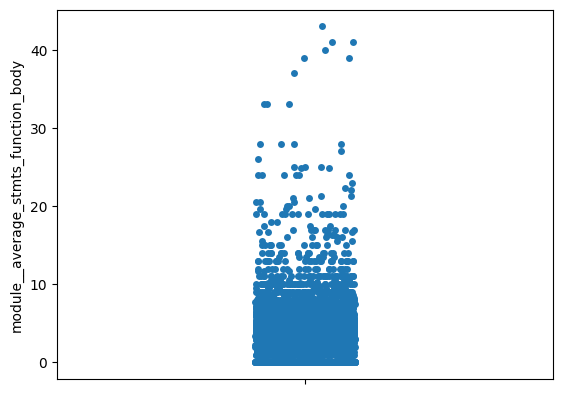

In [12]:
sns.stripplot(X['module__average_stmts_function_body'])

In [13]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7497278159999687
Rango valores atípicos extremos (Tukey): [-14.571428999999998,19.428572]
Rango valores atípicos leves (Tukey): [-7.285714499999999,12.142857499999998]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.5282784098201194,151.03539440945073]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -14.571428999999998 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -7.285714499999999 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 150 instancias tienen un valor para module__average_stmts_function_body superior a 12.142857499999998 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 2.106% del total de instancias.
+3.0IQR: 43 instancias tienen un valor para mo

In [14]:
X[X['module__average_stmts_function_body'] > 17.6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,58,58,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.0,58.0,58
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,23,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
mean,NaN,NaN,0.115485,0.110071,0.379310,2.103448,0.016492,0.983508,0.0,24.619122,0.0,0.0,NaN
std,NaN,NaN,0.184958,0.159202,2.024651,2.953972,0.088028,0.088028,0.0,6.877287,0.0,0.0,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.521739,0.0,18.000000,0.0,0.0,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,19.159091,0.0,0.0,NaN
50%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,22.166667,0.0,0.0,NaN
75%,NaN,NaN,0.229167,0.237500,0.000000,1.000000,0.000000,1.000000,0.0,26.750000,0.0,0.0,NaN


In [15]:
X[X['module__average_stmts_function_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,2776,2776,2776.000000,2776.000000,2776.000000,2776.0,2776.000000,2776.0,2776.0,2776.0,2776.000000,2776.000000,2776
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1189,2333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2756
mean,NaN,NaN,0.507616,0.125185,0.848343,0.0,0.360591,0.0,0.0,0.0,1.367999,0.041751,NaN
std,NaN,NaN,0.373109,0.189655,2.820207,0.0,0.480258,0.0,0.0,0.0,2.676226,0.137625,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN
25%,NaN,NaN,0.111111,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN
50%,NaN,NaN,0.560387,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN
75%,NaN,NaN,0.833333,0.200000,1.000000,0.0,1.000000,0.0,0.0,0.0,2.251786,0.000000,NaN


8602 ficheros con una media de 0 sentencias por funcion es muy raro. Vamos a realizar esta medición condicionado a tener al menos una función.

In [16]:
X[X['module__number_of_functions'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,4348,4348,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.0,4348.000000,4348.000000,4348.000000,4348
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1937,3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3907
mean,NaN,NaN,0.204711,0.109324,1.063247,4.871205,0.099621,0.900379,0.0,5.006165,0.929579,0.074391,NaN
std,NaN,NaN,0.211582,0.161653,4.337276,7.954522,0.201667,0.201667,0.0,3.516428,2.463208,0.193552,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.083333,0.0,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.991379,0.0,3.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.153846,0.019231,0.000000,2.000000,0.000000,1.000000,0.0,4.333334,0.000000,0.000000,NaN
75%,NaN,NaN,0.333333,0.166667,0.250000,5.000000,0.008621,1.000000,0.0,6.000000,0.000000,0.000000,NaN


Vamos a describir esta variable condicionada a tener al menos una función para ver la media real.

In [17]:
X[X['module__number_of_functions'] > 0]['module__average_stmts_function_body'].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

count    4348.000000
mean        5.006165
std         3.516428
min         1.000000
25%         3.000000
50%         4.333334
75%         6.000000
max        43.000000
Name: module__average_stmts_function_body, dtype: float64

### Variable average_stmts_method_body (6/14)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 1.66441.

Usando sentido común se va a condicionar este estudio a los ficheros con al menos una función.

<Axes: ylabel='module__average_stmts_method_body'>

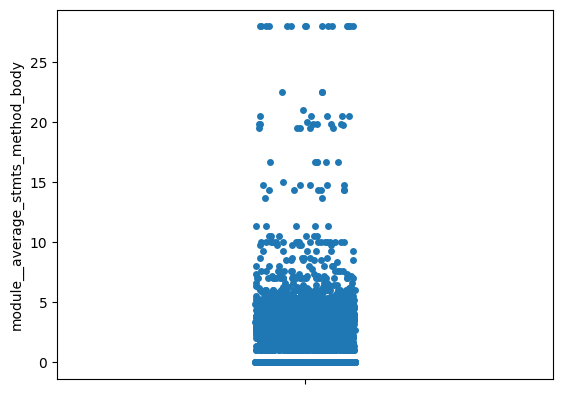

In [18]:
sns.stripplot(X['module__average_stmts_method_body'])

In [19]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8679952442194205
Rango valores atípicos extremos (Tukey): [-4.0714284,5.4285712]
Rango valores atípicos leves (Tukey): [-2.0357142,3.3928570000000002]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09757473915325422,66.90809211652984]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -4.0714284 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -2.0357142 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 957 instancias tienen un valor para module__average_stmts_method_body superior a 3.3928570000000002 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 13.43% del total de instancias.
+3.0IQR: 258 instancias tienen un valor para module__average_stmts_method_body superior a 5.

In [20]:
X[X['module__average_stmts_method_body'] > 37.3].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
unique,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los tres ficheros son de expertos así que nada raro.

In [21]:
X[X['module__average_stmts_method_body'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,5168,5168,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.0,5168.000000,5168.0,5168.000000,5168
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1707,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4756
mean,NaN,NaN,0.387492,0.144401,0.063854,2.697755,0.010690,0.645850,0.0,3.433658,0.0,0.033228,NaN
std,NaN,NaN,0.341574,0.192003,0.739932,5.527871,0.085898,0.474945,0.0,3.981517,0.0,0.141094,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
50%,NaN,NaN,0.333333,0.050000,0.000000,1.000000,0.000000,1.000000,0.0,3.000000,0.0,0.000000,NaN
75%,NaN,NaN,0.666667,0.250000,0.000000,3.000000,0.000000,1.000000,0.0,5.000000,0.0,0.000000,NaN


Vamos a describir la variable condicionada a tener al menos una clase

In [22]:
X[X['module__number_of_classes'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,2088,2088,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.0,2088.000000,2088.000000,2088.000000,2088
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1505,1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
mean,NaN,NaN,0.158765,0.039818,3.341954,3.865421,0.686855,0.313145,0.0,2.168140,3.754489,0.142632,NaN
std,NaN,NaN,0.176913,0.062299,6.472819,8.918499,0.336194,0.336194,0.0,2.563399,3.513914,0.231961,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.0,0.000000,2.000000,0.000000,NaN
50%,NaN,NaN,0.105263,0.000000,1.000000,1.000000,0.800000,0.200000,0.0,1.000000,3.210526,0.000000,NaN
75%,NaN,NaN,0.233694,0.058824,3.000000,4.000000,1.000000,0.666667,0.0,4.200000,4.375000,0.333333,NaN


### Variable name_convention (7/14)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

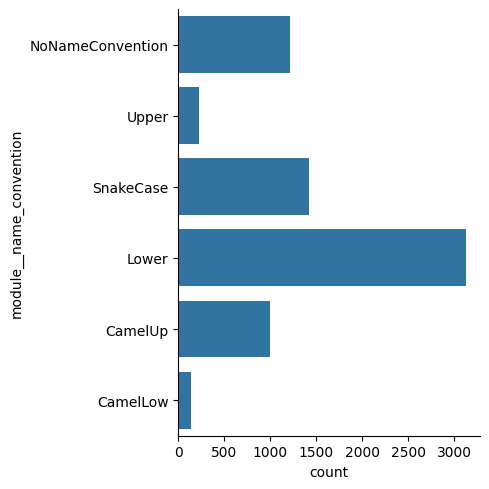

In [23]:
sns.catplot(full_table['module__name_convention'], kind="count")

In [24]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de Lower en un 43.88% de los items.
La variable module__name_convention toma el valor de SnakeCase en un 20.0% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 17.07% de los items.
La variable module__name_convention toma el valor de CamelUp en un 14.05% de los items.
La variable module__name_convention toma el valor de Upper en un 3.116% de los items.
La variable module__name_convention toma el valor de CamelLow en un 1.881% de los items.


### Variable global_stmts_pct (8/14)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.227542.

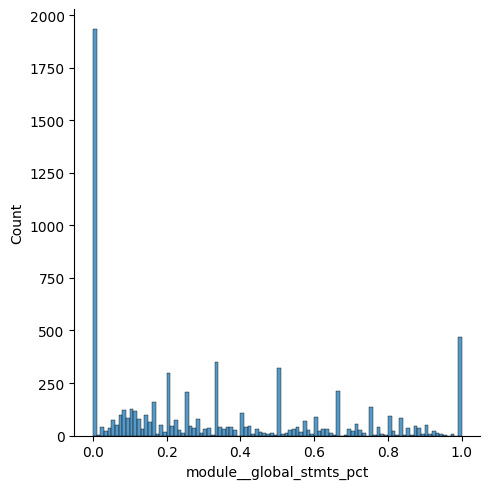

In [25]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

Hay muchos ficheros con 0. Hay que comprobar a que se puede deber. Seguramente por ser únicamente la definición de una clase.

In [26]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3781301434848183
Rango valores atípicos extremos (Tukey): [-1.6666668000000002,2.2222224]
Rango valores atípicos leves (Tukey): [-0.8333334000000001,1.3888890000000003]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.22184485805720489,4.337351857458195]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -1.6666668000000002 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.8333334000000001 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.3888890000000003 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 2.2222224 (Q3-3*IQR) para module__g

In [27]:
X[X['module__global_stmts_pct'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,1932,1932,1932.0,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.0,1932.000000,1932.000000,1932.000000,1932
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,921,1567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932
mean,NaN,NaN,0.0,0.111848,0.628364,2.591097,0.279403,0.682812,0.0,4.109531,1.151869,0.031830,NaN
std,NaN,NaN,0.0,0.211652,1.977497,4.277830,0.433846,0.451080,0.0,4.616984,2.371907,0.127806,NaN
min,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,3.500000,0.000000,0.000000,NaN
75%,NaN,NaN,0.0,0.142857,1.000000,3.000000,1.000000,1.000000,0.0,5.875000,2.000000,0.000000,NaN


Comprobar un fichero que tenga 0 de todo

### Variable global_expressions (9/14)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.094516. La media es MUY baja, habría que revisarlo.

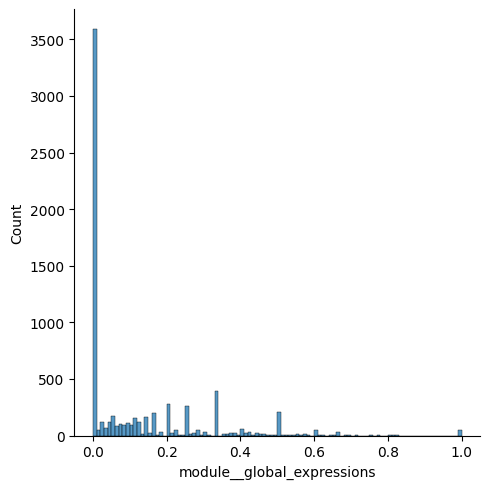

In [28]:
sns.displot(X['module__global_expressions'], bins=[i / 100 for i in range(0, 101)])

La mayoría es 0, relativamente lógico debido al uso de encapsulación.

In [29]:
print_outliers_for_df_column(X, 'module__global_expressions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5138257662389174
Rango valores atípicos extremos (Tukey): [-0.6000000000000001,0.8]
Rango valores atípicos leves (Tukey): [-0.30000000000000004,0.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.04966956110295443,2.5427612630505707]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions inferior a -0.6000000000000001 (Q1-3*IQR) para module__global_expressions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions inferior a -0.30000000000000004 (Q1-1.5*IQR) para module__global_expressions. Representando un 0.0% del total de instancias.
+1.5IQR: 211 instancias tienen un valor para module__global_expressions superior a 0.5 (Q3+1.5*IQR) para module__global_expressions. Representando un 2.962% del total de instancias.
+3.0IQR: 49 instancias tienen un valor para module__global_expressions superior a 0.8 (Q3-3*IQR) para module__global_expressions. R

In [30]:
X[X['module__global_expressions'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3542,3542,3542.000000,3542.000000,3542.00000,3542.000000,3542.000000,3542.00000,3542.0,3542.000000,3542.000000,3542.000000,3542
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1403,2167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3338
mean,NaN,NaN,0.342670,0.232313,1.13834,3.018634,0.158004,0.56221,0.0,3.074319,1.014070,0.050381,NaN
std,NaN,NaN,0.277588,0.182331,4.88143,7.101491,0.314513,0.46048,0.0,3.334173,2.241680,0.166564,NaN
min,NaN,NaN,0.000000,0.009524,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.083333,0.090909,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.333333,0.200000,0.00000,1.000000,0.000000,0.75000,0.0,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.583333,0.333333,1.00000,3.000000,0.125000,1.00000,0.0,5.000000,0.000000,0.000000,NaN


In [31]:
X[X['module__global_expressions'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3582,3582,3582.000000,3582.0,3582.000000,3582.000000,3582.000000,3582.000000,3582.0,3582.000000,3582.000000,3582.000000,3582
unique,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1723,3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325
mean,NaN,NaN,0.303040,0.0,0.822446,2.927973,0.244138,0.536990,0.0,3.036730,1.185801,0.072838,NaN
std,NaN,NaN,0.358685,0.0,2.325813,6.177705,0.398526,0.472163,0.0,3.984280,2.832431,0.181584,NaN
min,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.157895,0.0,0.000000,1.000000,0.000000,0.666667,0.0,2.500000,0.000000,0.000000,NaN
75%,NaN,NaN,0.500000,0.0,1.000000,3.000000,0.400000,1.000000,0.0,4.692308,1.773585,0.000000,NaN


### Variable class_defs_pct (10/14)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.31924. 

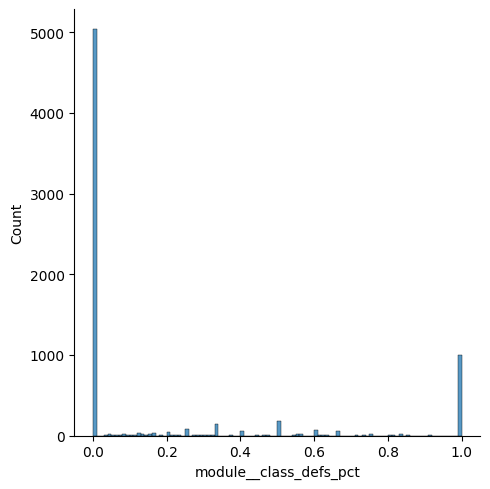

In [32]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [33]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5486870414411849
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0549553688814768,3.616652451195506]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -0.75 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -0.375 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1153 instancias tienen un valor para module__class_defs_pct superior a 0.625 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 16.18% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 1.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para mod

In [34]:
X[X['module__class_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,2088,2088,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.0,2088.000000,2088.000000,2088.000000,2088
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1505,1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
mean,NaN,NaN,0.158765,0.039818,3.341954,3.865421,0.686855,0.313145,0.0,2.168140,3.754489,0.142632,NaN
std,NaN,NaN,0.176913,0.062299,6.472819,8.918499,0.336194,0.336194,0.0,2.563399,3.513914,0.231961,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.0,0.000000,2.000000,0.000000,NaN
50%,NaN,NaN,0.105263,0.000000,1.000000,1.000000,0.800000,0.200000,0.0,1.000000,3.210526,0.000000,NaN
75%,NaN,NaN,0.233694,0.058824,3.000000,4.000000,1.000000,0.666667,0.0,4.200000,4.375000,0.333333,NaN


### Variable function_defs_pct (11/14)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.458978

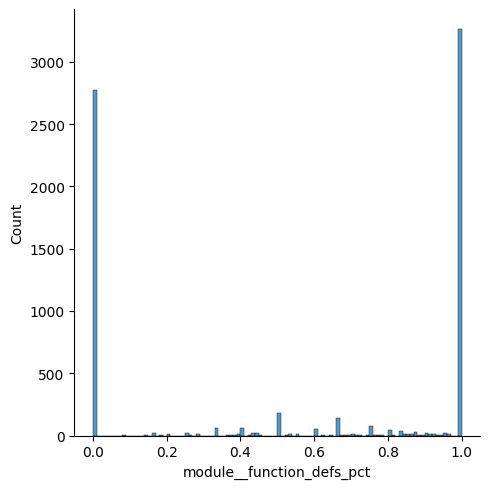

In [35]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [36]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.15652114700400502
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.8673099175332213,3.805410000765959]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

In [37]:
X[X['module__function_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,4348,4348,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.0,4348.000000,4348.000000,4348.000000,4348
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1937,3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3907
mean,NaN,NaN,0.204711,0.109324,1.063247,4.871205,0.099621,0.900379,0.0,5.006165,0.929579,0.074391,NaN
std,NaN,NaN,0.211582,0.161653,4.337276,7.954522,0.201667,0.201667,0.0,3.516428,2.463208,0.193552,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.083333,0.0,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.991379,0.0,3.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.153846,0.019231,0.000000,2.000000,0.000000,1.000000,0.0,4.333334,0.000000,0.000000,NaN
75%,NaN,NaN,0.333333,0.166667,0.250000,5.000000,0.008621,1.000000,0.0,6.000000,0.000000,0.000000,NaN


In [38]:
X[X['module__function_defs_pct'] < 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,3863,3863,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.0,3863.000000,3863.000000,3863.000000,3863
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1956,2899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3780
mean,NaN,NaN,0.417348,0.100148,1.806368,2.089309,0.371254,0.169259,0.0,1.171907,2.029349,0.077094,NaN
std,NaN,NaN,0.358016,0.167364,5.041392,6.833338,0.422229,0.292300,0.0,2.172264,3.189730,0.184743,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.333333,0.000000,1.000000,0.000000,0.153846,0.000000,0.0,0.000000,1.000000,0.000000,NaN
75%,NaN,NaN,0.750000,0.142857,1.000000,1.000000,1.000000,0.333333,0.0,2.000000,3.386555,0.000000,NaN


### Variable enum_defs_pct (12/14)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 1.0. Su media es 0.003743.

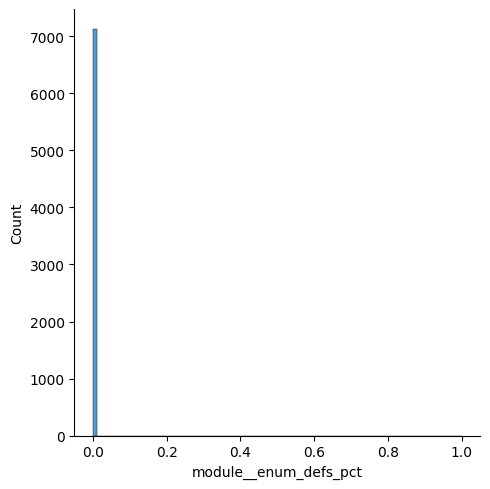

In [39]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [40]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__enum_defs_pct. Representa

In [41]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
unique,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Solo se han usado enum en 189 de las cerca de 19mil ficheros. En los ficheros donde se usan enum, su media es de 0.36.

### Variable type_annotations_pct (13/14)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 1.0. Su media es 0.142791. Esto nos dice que los tipos son poco usados en Python, como era de esperar.

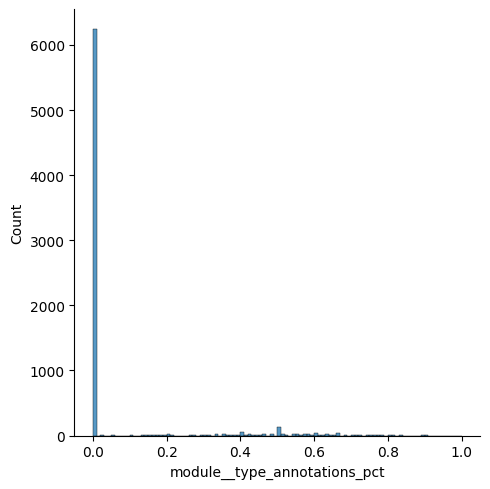

In [42]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [43]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.789497643577211
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 885 instancias tienen un valor para module__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 12.42% del total de instancias.
+3.0IQR: 885 instancias tienen un valor para module__type_annotations_pct superior a 0.0 (Q3-3*IQR) para module__type_annotations_pct. Representando un 12.42% del total de instancias.
L: 0 instancias tienen un valor pa

In [44]:
X[X['module__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point
count,885,885,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.0,885.000000,885.000000,885.000000,885
unique,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Lower,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,578,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870
mean,NaN,NaN,0.157334,0.030448,1.980791,3.969492,0.463983,0.536017,0.0,2.958080,2.824511,0.496445,NaN
std,NaN,NaN,0.148785,0.055619,3.028274,6.485990,0.409216,0.409216,0.0,2.348784,4.415740,0.172141,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007246,NaN
25%,NaN,NaN,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.400000,NaN
50%,NaN,NaN,0.103448,0.000000,1.000000,2.000000,0.333333,0.666667,0.0,3.333333,1.773585,0.500000,NaN
75%,NaN,NaN,0.200000,0.047619,2.000000,4.000000,1.000000,1.000000,0.0,4.600000,3.750000,0.600000,NaN
